In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 205
pd.options.display.max_columns = 30

In [15]:
df = pd.read_csv("./datasets/clean/final_df.csv")
#df = df.drop('Unnamed: 0', axis=1)

In [16]:
df

,Region_ID,AP,GA,SA,ms,Decentralized_Dummy,NUTS level,QoG,num_prog,gdpc,unpl,dens_log,edu,share_agri,share_ind,plan_log,eu_position_weighted,lrgen_weighted,lrecon_weighted,v2xpa_popul_weighted,v2pagovsup_weighted
0,AT,60.336442,90.922093,54.859156,AT,0,0.0,0.819825,4,38600.0,5.6,4.641502,29.9,0.014349,0.227004,22.544804,4.915934,5.989361,5.136636,0.331800,1.570333
1,BE,45.144179,86.553360,39.073804,BE,0,0.0,0.629432,5,36000.0,8.5,5.912421,36.9,0.007129,0.167180,21.371476,5.599646,5.477197,5.414862,0.312126,1.835121
2,BE1,52.658794,100.748111,53.052741,BE,1,1.0,0.072500,2,64500.0,18.3,8.898284,43.5,0.000223,0.055502,18.751737,5.902877,4.711215,4.834071,0.192366,1.621079
3,BE2,50.394916,97.176356,48.971944,BE,1,1.0,1.094000,1,36200.0,5.1,6.177529,37.2,0.009015,0.199262,18.943333,5.450439,6.163918,5.976438,0.403006,2.069075
4,BE3,41.235006,105.938794,43.683868,BE,1,1.0,0.032500,1,26000.0,11.9,5.365041,33.9,0.008060,0.178463,20.325811,5.877322,3.996001,4.182051,0.151687,1.417581
5,BG,46.912808,93.715112,43.964391,BG,0,0.0,-1.860320,10,6100.0,11.4,4.194190,27.0,0.052561,0.226058,23.026554,5.785391,5.095496,4.917329,0.410929,1.527400
6,CY,51.110836,95.039427,48.575445,CY,0,0.0,0.040500,4,20500.0,16.1,4.527209,40.3,0.021047,0.071142,20.676720,5.567848,5.314265,5.579737,0.509730,1.801456
7,CZ,50.556807,101.523117,51.326846,CZ,0,0.0,-0.497730,8,15100.0,6.1,4.914858,21.5,0.026434,0.314508,23.881001,4.680594,5.213660,4.991212,0.411275,1.704593
8,DE,58.707529,98.000667,57.533770,DE,0,0.0,0.769587,2,36100.0,5.0,5.422745,27.1,0.010048,0.254666,21.746747,5.594399,5.113758,4.996227,0.196714,1.397356
9,DE1,58.529510,95.470975,55.878694,DE,1,1.0,0.901500,3,41500.0,3.1,5.699105,29.8,0.006111,0.342568,21.095520,5.754355,5.204263,5.206401,0.185915,1.335871


Text(0.5, 1.0, 'Absorption Speed across regions')

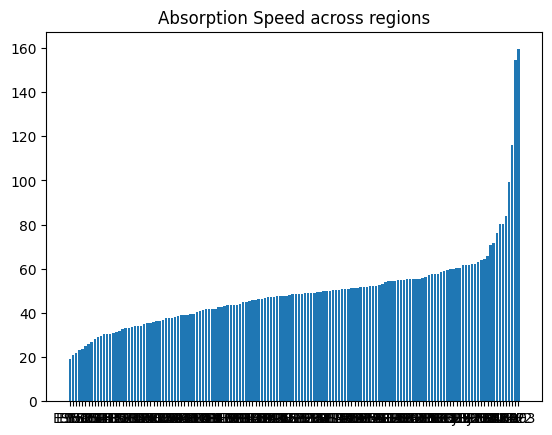

In [17]:
plt.bar(df.sort_values(by="SA")["Region_ID"], df.sort_values(by="SA")["SA"], )
plt.title("Absorption Speed across regions")

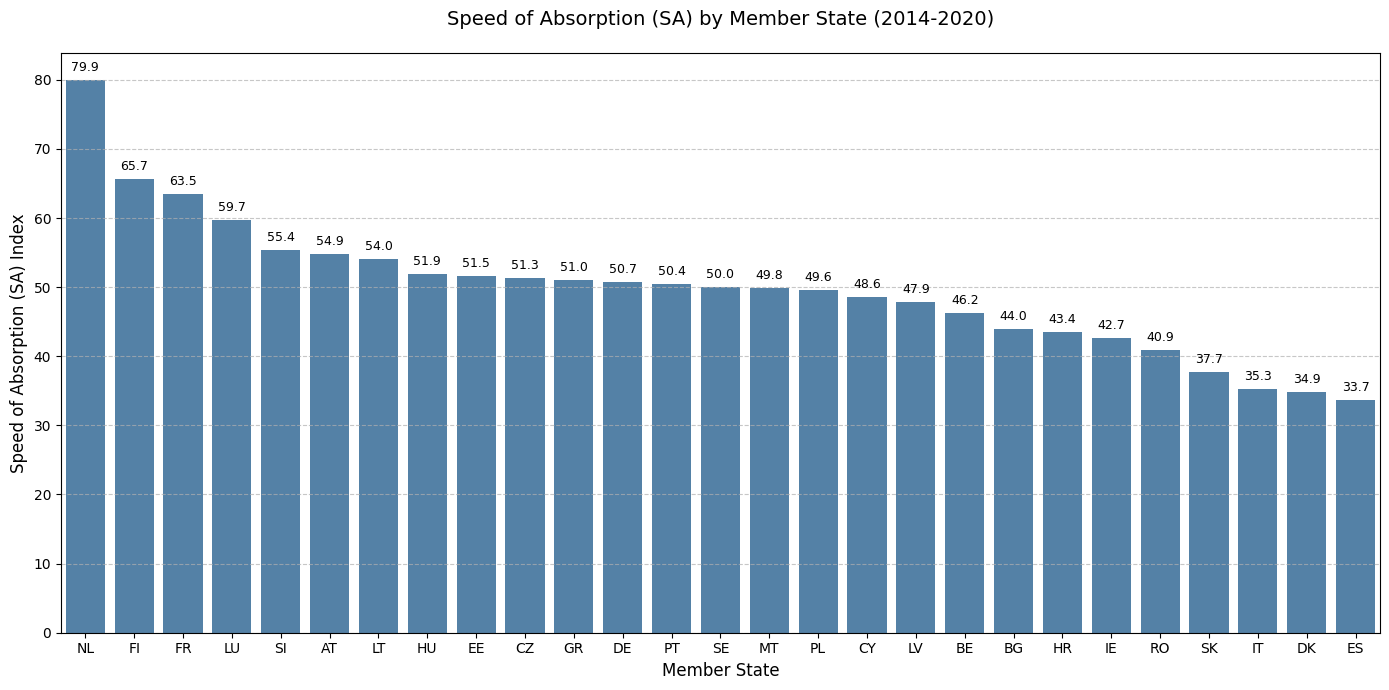

In [18]:
import seaborn as sns

# ---------------------------------------------------------
# 1. PREPARE THE DATA (Aggregate to Country Level)
# ---------------------------------------------------------
# Calculate the Mean SA per Country
# Note: You might want to use a weighted average by budget size if you want to be precise,
# but a simple mean is standard for this type of "Performance by MS" chart.
country_stats = df.groupby('ms')['SA'].mean().reset_index()

# Sort by SA (Highest to Lowest) to match the "ranking" style of Figure 1
country_stats = country_stats.sort_values('SA', ascending=False)

# ---------------------------------------------------------
# 2. CREATE THE PLOT
# ---------------------------------------------------------
plt.figure(figsize=(14, 7))

# Create the Bar Chart
# We use a clean color (steelblue) similar to academic publications
ax = sns.barplot(
    data=country_stats, 
    x='ms', 
    y='SA', 
    color='#4682B4' # SteelBlue
)

# ---------------------------------------------------------
# 3. FORMATTING (To make it look like a Paper Figure)
# ---------------------------------------------------------
plt.title('Speed of Absorption (SA) by Member State (2014-2020)', fontsize=14, pad=20)
plt.xlabel('Member State', fontsize=12)
plt.ylabel('Speed of Absorption (SA) Index', fontsize=12)

# Add horizontal grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=9)

# Clean up the layout
plt.tight_layout()

# Save it (optional)
plt.savefig('./graphs/SA_by_Country.png', dpi=300)

# Show it
plt.show()

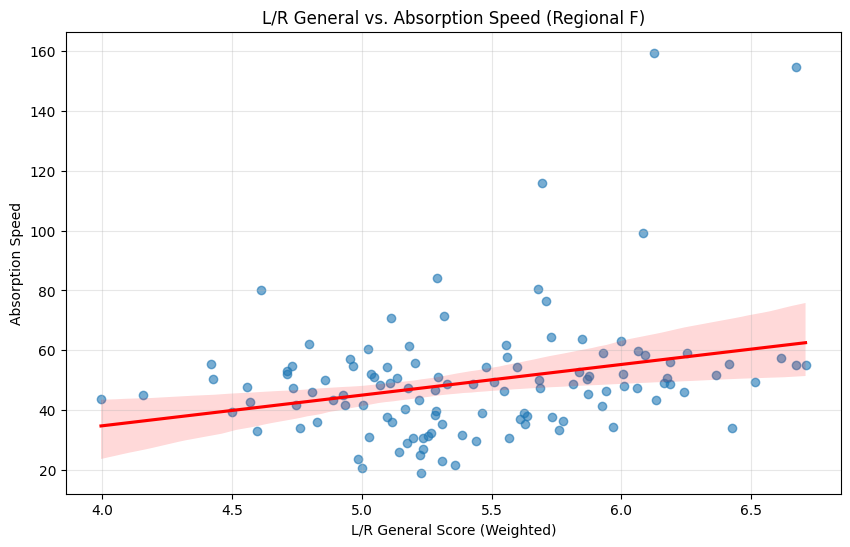


                     Naive OLS   Country FE Country FE (Regions only), lrecon Country FE (Regions only), lrgen Country FE (Regions only), lrgen, no QoG
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept            139.3916   -8.3090     7.6329                            -14.0035                         -18.9839                                
                     (98.8517)  (140.5933)  (105.9506)                        (100.1715)                       (101.1312)                              
eu_position_weighted -5.5503    -1.2145     -5.3796                           -1.3769                          -0.8296                                 
                     (3.4356)   (6.8221)    (5.0698)                          (6.6396)                         (6.0295)                                
v2xpa_popul_weighted 9.1107     4.0505      -12.0700                          -35.8969 

In [23]:

import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

df_model = df.copy()
df_model_regio = df[df["NUTS level"] != 0].copy()

# 1. Prepare Data: Log GDP is standard practice for economic regressions
df_model['log_gdp'] = np.log(df_model['gdpc'])
df_model_regio['log_gdp'] = np.log(df_model_regio['gdpc'])

# 2. Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x='lrgen_weighted', y='SA', data=df_model_regio, 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('L/R General vs. Absorption Speed (Regional F)')
plt.xlabel('L/R General Score (Weighted)')
plt.ylabel('Absorption Speed')
plt.grid(True, alpha=0.3)
plt.show()

# 3. The Models
# Model A: Naive (Good for showing the "bias")
model_a = smf.ols(
    formula='SA ~ eu_position_weighted + v2xpa_popul_weighted + lrecon_weighted + log_gdp + QoG + plan_log + num_prog + unpl + dens_log + edu + share_agri + share_ind',
    data=df_model
).fit()

# Model B: Country Fixed Effects (The rigorous model)
# We cluster standard errors by 'ms' (Member State)
model_b = smf.ols(
    formula='SA ~ eu_position_weighted + v2xpa_popul_weighted + lrecon_weighted + log_gdp + QoG + plan_log + num_prog + unpl + dens_log + edu + share_agri + share_ind + C(ms)',
    data=df_model
).fit(cov_type='cluster', cov_kwds={'groups': df_model['ms']})

# Model C: 
model_c = smf.ols(
    formula='SA ~ eu_position_weighted + v2xpa_popul_weighted + lrecon_weighted + log_gdp + QoG + plan_log + num_prog + unpl + dens_log + edu + share_agri + share_ind + C(ms)',
    data=df_model_regio
).fit(cov_type='cluster', cov_kwds={'groups': df_model_regio['ms']})

model_d = smf.ols(
    formula='SA ~ eu_position_weighted + v2xpa_popul_weighted + lrgen_weighted + log_gdp + QoG + plan_log + num_prog + unpl + dens_log + edu + share_agri + share_ind + C(ms)',
    data=df_model_regio
).fit(cov_type='cluster', cov_kwds={'groups': df_model_regio['ms']})

model_e = smf.ols(
    formula='SA ~ eu_position_weighted + v2xpa_popul_weighted + lrgen_weighted + log_gdp + plan_log + num_prog + unpl + dens_log + edu + share_agri + share_ind + C(ms)',
    data=df_model_regio
).fit(cov_type='cluster', cov_kwds={'groups': df_model_regio['ms']})

# Compare Results
from statsmodels.iolib.summary2 import summary_col
print(summary_col([model_a, model_b, model_c, model_d, model_e], stars=True, 
                  model_names=['Naive OLS', 'Country FE', 'Country FE (Regions only), lrecon', 'Country FE (Regions only), lrgen', 'Country FE (Regions only), lrgen, no QoG'],
                  info_dict={'N':lambda x: str(int(x.nobs)), 'R2':lambda x: "{:.2f}".format(x.rsquared)}))

summary = summary_col([model_a, model_b, model_c, model_d], stars=True, 
                  model_names=['Naive OLS', 'Country FE', 'Country FE (Regions only), lrecon', 'Country FE (Regions only), lrgen'],
                  info_dict={'N':lambda x: str(int(x.nobs)), 'R2':lambda x: "{:.2f}".format(x.rsquared)})

#print(summary.as_latex())

In [ ]:
from statsmodels.iolib.summary2 import summary_col

table = summary_col(
    [model_a, model_b, model_c],
    stars=True,
    float_format='%0.3f',
    model_names=['Naive OLS', 'Country FE', 'Country FE (Regions only)'],
    info_dict={
        'Observations': lambda x: f"{int(x.nobs)}",
        'R-squared': lambda x: f"{x.rsquared:.2f}",
        'Country FE': lambda x: 'Yes' if 'C(ms)' in x.model.formula else 'No'
    }
)

with open("regression_table.tex", "w") as f:
    f.write(table.as_latex())

In [24]:
df_reg_filter = df[df["Decentralized_Dummy"] != 0].copy()

<Figure size 1400x600 with 0 Axes>

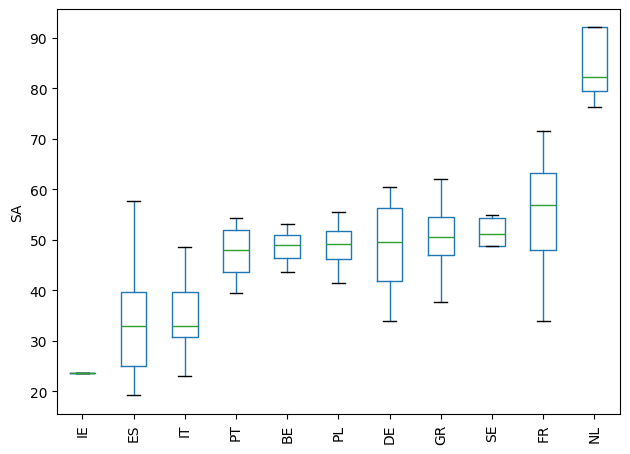

In [25]:
# Sort member states by median SA
order = (
    df_reg_filter.groupby("ms", observed=False)["SA"]
    .median()
    .sort_values()
    .index
)

df_reg_filter["ms"] = pd.Categorical(df_reg_filter["ms"], categories=order, ordered=True)

plt.figure(figsize=(14,6))

df_reg_filter.boxplot(
    column="SA",
    by="ms",
    grid=False,
    showfliers=False
)

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("SA")
plt.title("")
plt.suptitle("")

plt.tight_layout()
plt.show()


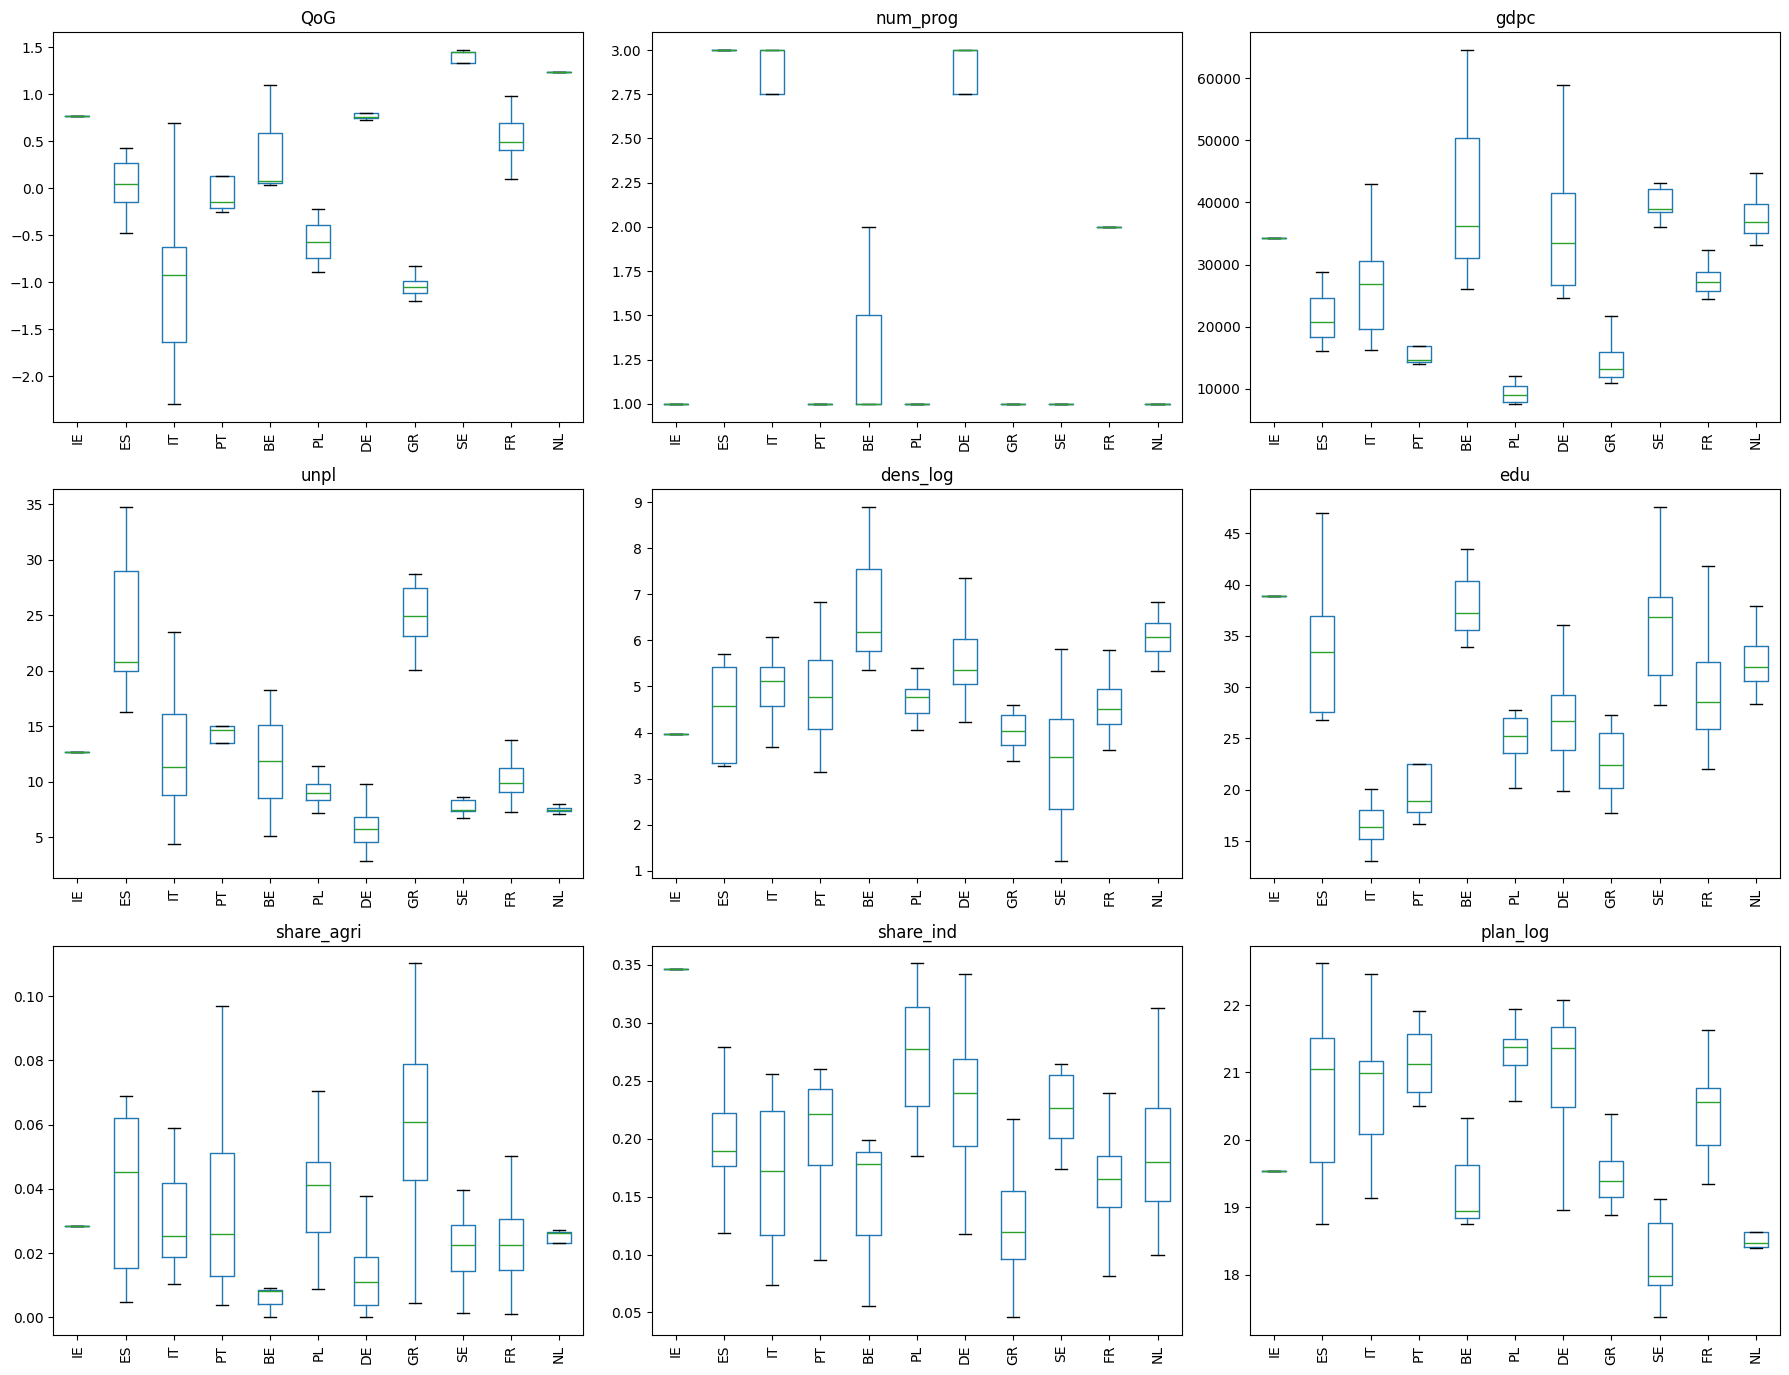

In [26]:
vars1 = [
    'QoG', 'num_prog', 'gdpc', 'unpl', 'dens_log',
    'edu', 'share_agri', 'share_ind', 'plan_log'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for ax, var in zip(axes, vars1):
    
    order = (
        df_reg_filter.groupby("ms", observed=False)[var]
        .median()
        .sort_values()
        .index
    )
    
    df_reg_filter["ms"] = pd.Categorical(df_reg_filter["ms"], categories=order, ordered=True)
    
    df_reg_filter.boxplot(
        column=var,
        by="ms",
        ax=ax,
        grid=False,
        showfliers=False
    )
    
    ax.set_title(var)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=90)

# Remove automatic pandas titles
plt.suptitle("")
plt.tight_layout()
plt.show()


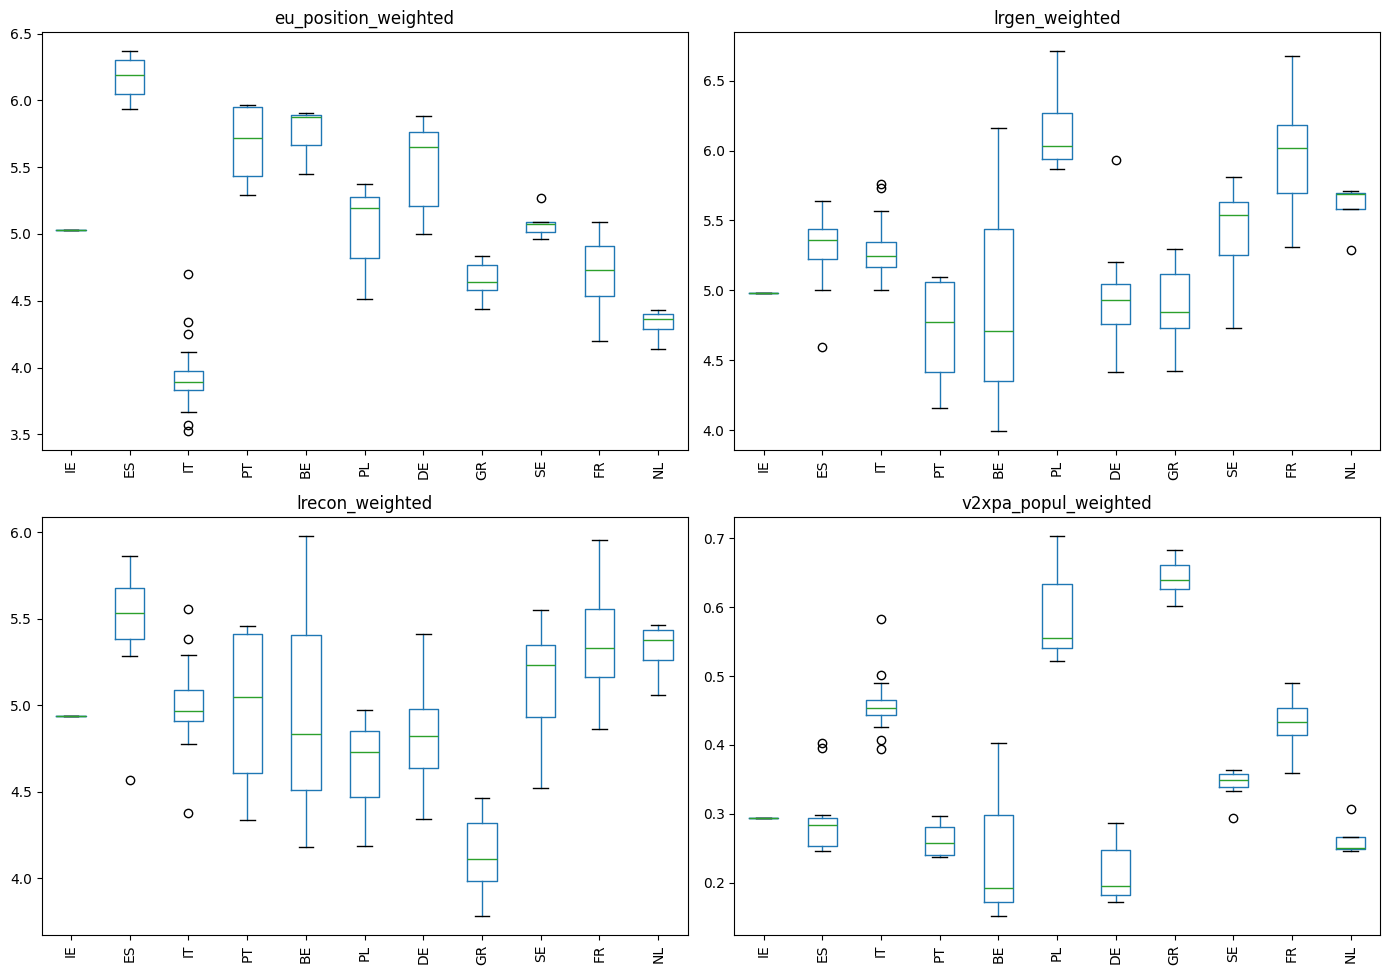

In [27]:
vars2 = [
    'eu_position_weighted',
    'lrgen_weighted',
    'lrecon_weighted',
    'v2xpa_popul_weighted'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, var in zip(axes, vars2):
    
    order = (
        df_reg_filter.groupby("ms", observed=False)[var]
        .median()
        .sort_values()
        .index
    )
    
    df_reg_filter["ms"] = pd.Categorical(df_reg_filter["ms"], categories=order, ordered=True)
    
    df_reg_filter.boxplot(
        column=var,
        by="ms",
        ax=ax,
        grid=False,
        showfliers=True
    )
    
    ax.set_title(var)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=90)

plt.suptitle("")
plt.tight_layout()
plt.show()


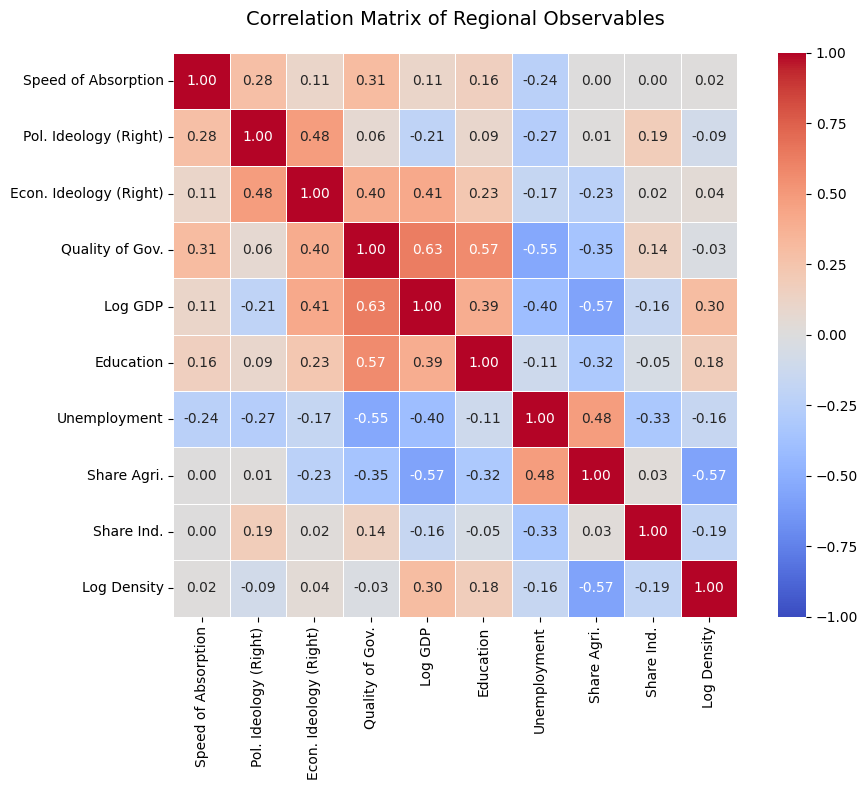

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data and filter for regions
df['log_gdp'] = np.log(df['gdpc'])
df_regional = df[df['NUTS level'] > 0].copy()

# 2. Select your main regressor and the regional controls
# (I've included the key observables your supervisor is worried about)
variables_to_correlate = [
    'SA',
    'lrgen_weighted', 
    'lrecon_weighted',
    'QoG', 
    'log_gdp', 
    'edu', 
    'unpl', 
    'share_agri', 
    'share_ind', 
    'dens_log'
]

# Create a clean dataframe for the matrix
corr_df = df_regional[variables_to_correlate].copy()

# Rename columns so the plot looks professional in your thesis
corr_df.columns = [
    'Speed of Absorption',
    'Pol. Ideology (Right)', 
    'Econ. Ideology (Right)',
    'Quality of Gov.', 
    'Log GDP', 
    'Education', 
    'Unemployment', 
    'Share Agri.', 
    'Share Ind.', 
    'Log Density'
]

# 3. Calculate the Pearson correlation matrix
corr_matrix = corr_df.corr()

# 4. Plot the Heatmap
plt.figure(figsize=(10, 8))
# Use a diverging color map so 0 is white, positive is red, negative is blue
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

plt.title('Correlation Matrix of Regional Observables', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('./graphs/correlation_matrix.png', dpi=300)
plt.show()